# Assignment 2 -- Randomized optimization

### To run this code you need
* Python 3.x

### and the following packages
* numpy
* pandas
* matplotlib
* scikitlearn
* mlrose_hiive

### Dataset urls
* [Dataset 1](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)
* [Dataset 2](https://archive.ics.uci.edu/ml/datasets/adult)
------

In [161]:
import time
import mlrose_hiive as ml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [693]:
display_curve = True
max_attempts = 100
max_iters = 1000
random_state = 1
pop_size = 100
mutation_prob = 0.1
keep_pct = 0.2


def plot_curve(curve):
    plt.figure(figsize=(15, 10))
    plt.plot([i for i in range(1, len(curve) + 1)], curve[:, 0], '-o')
    plt.show()

# Problem 1 - Knapsack

In [685]:
# Initial state
# fitness = ml.Queens()
import random

weights = list(np.random.randint(low=1, high=100, size=50))
values = list(np.random.randint(low=1, high=100, size=50))
max_weight_pct = 0.8
fitness = ml.Knapsack(weights, values, max_weight_pct)
init_state = np.array([0, 0, 0, 0, 0, 0, 0, 0])

# Define optimization problem object
problem = ml.DiscreteOpt(length=len(weights), fitness_fn=fitness)
# Define decay schedule
schedule = ml.GeomDecay(decay=0.8, min_temp=0.0)

best state: [1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 0 1 1 1 0 0 1 1 1 1 1 1 1]
best fitness score: 2111.0
number of iterations: 142
time taken: 12155693


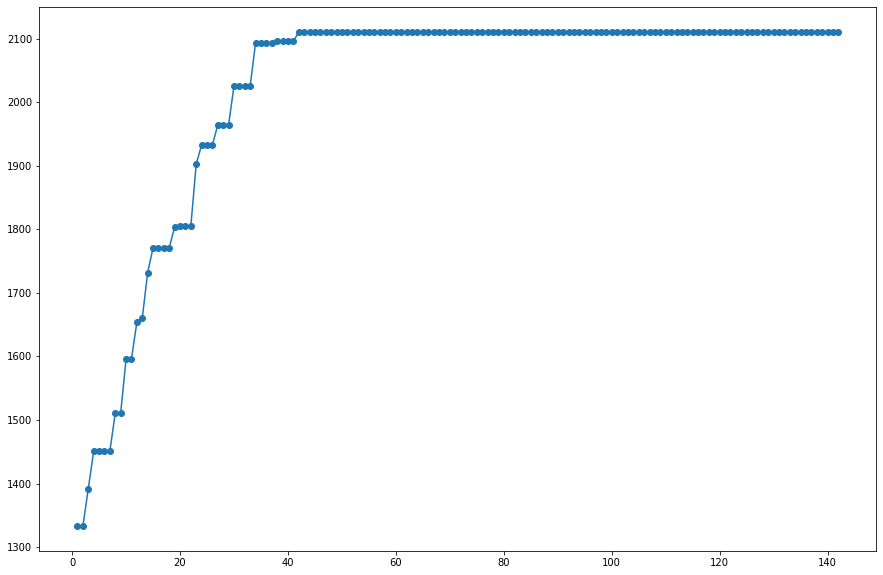

In [686]:
start = time.perf_counter_ns()
best_state_hc1, best_fitness_hc1, curve_hc1 = ml.random_hill_climb(
    problem,
    max_attempts=max_attempts,
    max_iters=max_iters,
    restarts=0,
    init_state=None,
    curve=display_curve,
    random_state=None)
end = time.perf_counter_ns()
train_time_hc1 = end - start

print(f'best state: {best_state_hc1}')
print(f'best fitness score: {best_fitness_hc1}')
print(f'number of iterations: {len(curve_hc1)}')
print(f'time taken: {train_time_hc1}')

plot_curve(curve_hc1)

best state: [1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0]
best fitness score: 1983.0
number of iterations: 161
time taken: 30461764


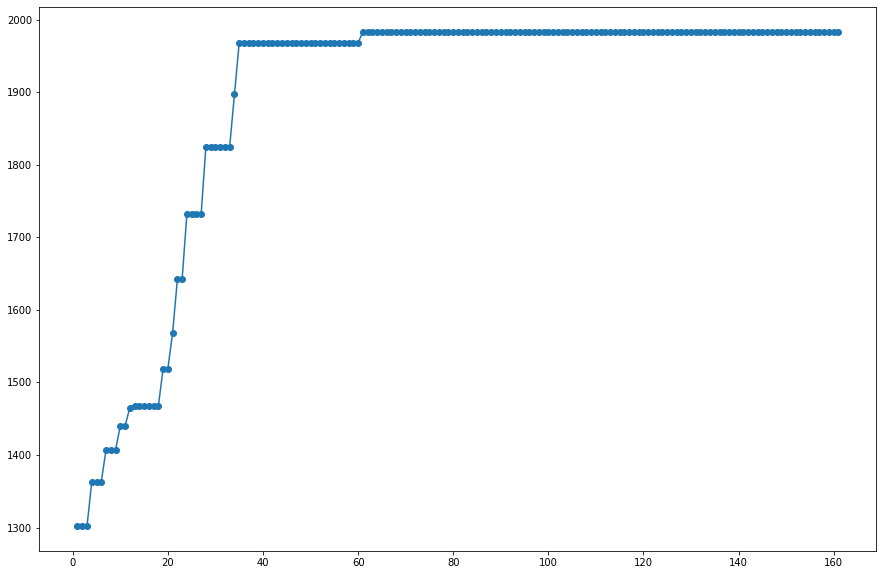

In [687]:
start = time.perf_counter_ns()       
best_state_sa1, best_fitness_sa1, curve_sa1 = ml.simulated_annealing(
    problem, 
    schedule = schedule,
    max_attempts = max_attempts,
    max_iters = max_iters,
    init_state = None,
    random_state = random_state,
    curve=display_curve)
end = time.perf_counter_ns()
train_time_sa1 = end - start

print(f'best state: {best_state_sa1}')
print(f'best fitness score: {best_fitness_sa1}')
print(f'number of iterations: {len(curve_sa1)}')
print(f'time taken: {train_time_sa1}')

plot_curve(curve_sa1)

best state: [1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1]
best fitness score: 2503.0
number of iterations: 136
time taken: 1948768504


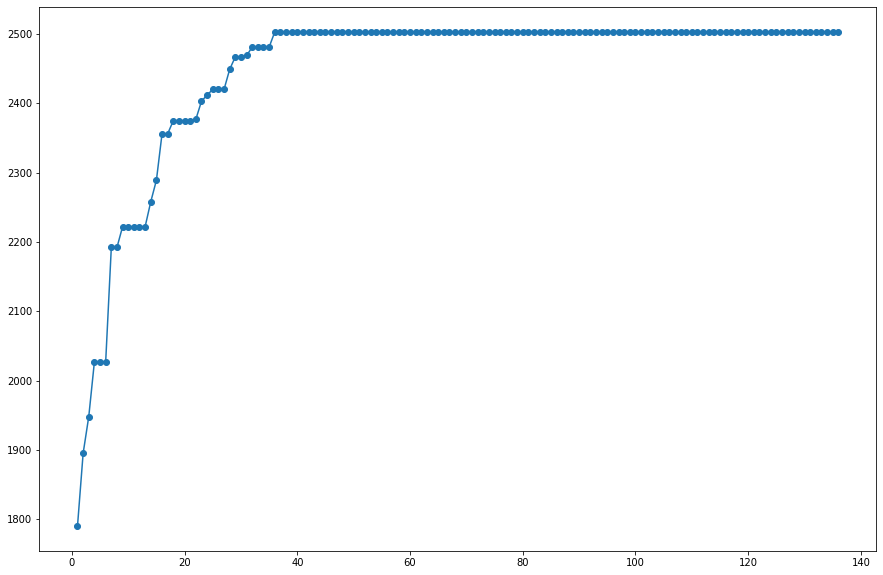

In [688]:
start = time.perf_counter_ns()
best_state_ga1, best_fitness_ga1, curve_ga1 = ml.genetic_alg(
    problem,
    pop_size=pop_size,
    mutation_prob=mutation_prob,
    max_attempts=max_attempts,
    max_iters=max_iters,
    curve=display_curve,
    random_state=random_state)
end = time.perf_counter_ns()
train_time_ga1 = end - start

print(f'best state: {best_state_ga1}')
print(f'best fitness score: {best_fitness_ga1}')
print(f'number of iterations: {len(curve_ga1)}')
print(f'time taken: {train_time_ga1}')

plot_curve(curve_ga1)

best state: [1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1]
best fitness score: 2465.0
number of iterations: 108
time taken: 177547246286


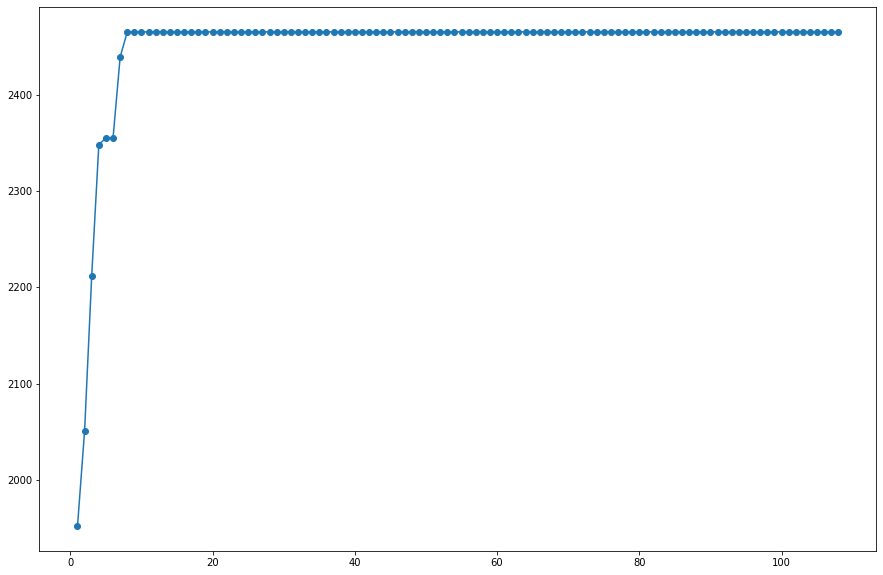

In [696]:
start = time.perf_counter_ns()
best_state_m1, best_fitness_m1, curve_m1 = ml.mimic(
    problem,
    pop_size=pop_size,
    keep_pct=keep_pct,
    max_attempts=max_attempts,
    max_iters=max_iters,
    curve=display_curve,
    random_state=random_state)
end = time.perf_counter_ns()
train_time_m1 = end - start

print(f'best state: {best_state_m1}')
print(f'best fitness score: {best_fitness_m1}')
print(f'number of iterations: {len(curve_m1)}')
print(f'time taken: {train_time_m1}')

plot_curve(curve_m1)

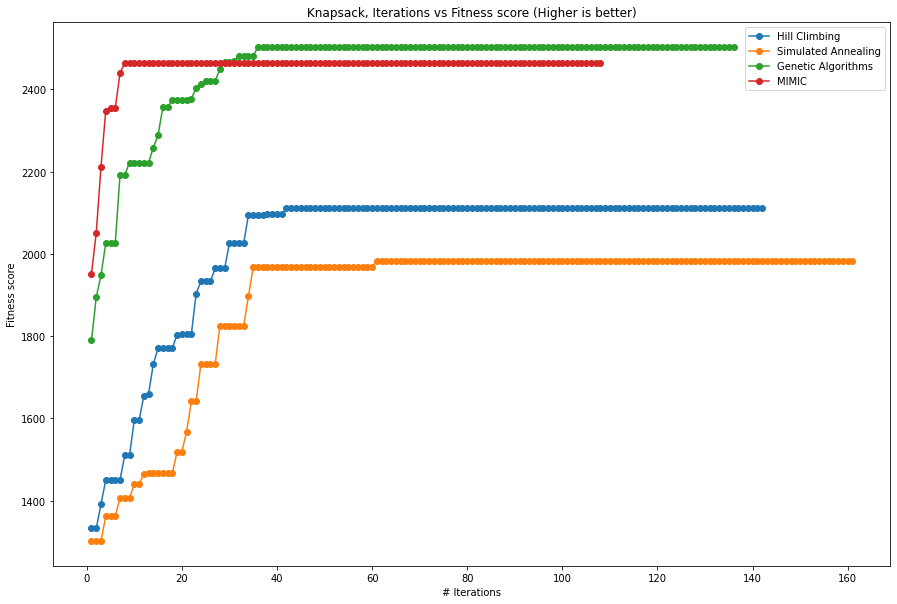

In [697]:
plt.figure(figsize=(15, 10))
plt.plot([i for i in range(1, len(curve_hc1) + 1)], curve_hc1[:, 0], '-o', label="Hill Climbing")
plt.plot([i for i in range(1, len(curve_sa1) + 1)], curve_sa1[:, 0], '-o', label="Simulated Annealing")
plt.plot([i for i in range(1, len(curve_ga1) + 1)], curve_ga1[:, 0], '-o', label="Genetic Algorithms")
plt.plot([i for i in range(1, len(curve_m1) + 1)], curve_m1[:, 0], '-o', label="MIMIC")
plt.title("Knapsack, Iterations vs Fitness score (Higher is better)")
plt.xlabel("# Iterations")
plt.ylabel("Fitness score")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Algortihm run time')

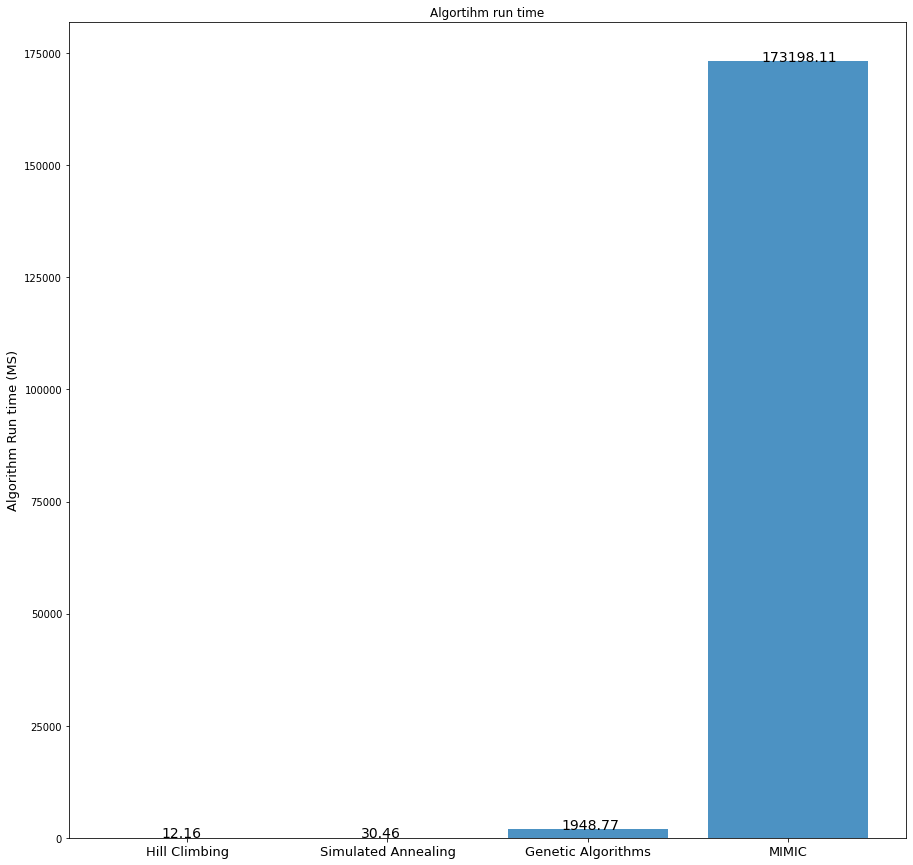

In [691]:
objects = ('Hill Climbing', 'Simulated Annealing','Genetic Algorithms', 'MIMIC')
y_pos = np.arange(len(objects))
train_times = np.around(np.array([train_time_hc1, train_time_sa1, train_time_ga1, train_time_m1]) / 1e6, 2) # convert to MS

plt.figure(figsize=(15, 15))
# plt.ylim(0.2, 0.9)
plt.bar(y_pos, train_times, align='center', alpha=0.8)
plt.xticks(y_pos, objects, fontsize=13)
for index, value in enumerate(train_times):
    plt.text(index-0.13, value+40, str(value), fontsize=14)
plt.ylabel('Algorithm Run time (MS)', fontsize=13)
plt.title('Algortihm run time')

# Problem 2 - Four Peaks

In [554]:
fitness = ml.FourPeaks()
problem = ml.DiscreteOpt(length = 50, fitness_fn = fitness, maximize=True)

best state: [1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 0 1 1 0]
best fitness score: 3.0
number of iterations: 171
time taken: 7692872


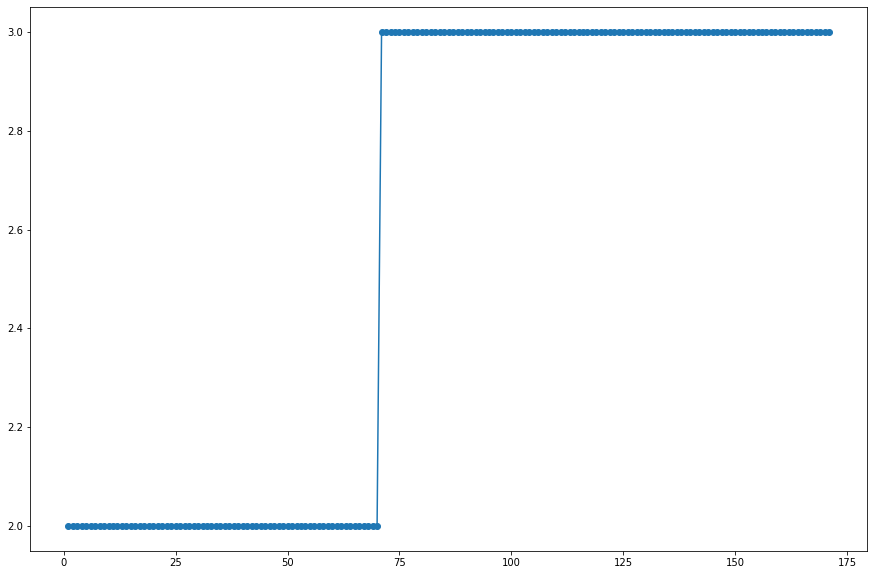

In [555]:
start = time.perf_counter_ns()
best_state_hc2, best_fitness_hc2, curve_hc2 = ml.random_hill_climb(
    problem,
    max_attempts=max_attempts,
    max_iters=max_iters,
    restarts=0,
    init_state=None,
    curve=display_curve,
    random_state=random_state)
end = time.perf_counter_ns()
train_time_hc2 = end - start

print(f'best state: {best_state_hc2}')
print(f'best fitness score: {best_fitness_hc2}')
print(f'number of iterations: {len(curve_hc2)}')
print(f'time taken: {train_time_hc2}')

plot_curve(curve_hc2)

best state: [0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
best fitness score: 23.0
number of iterations: 1000
time taken: 115014397


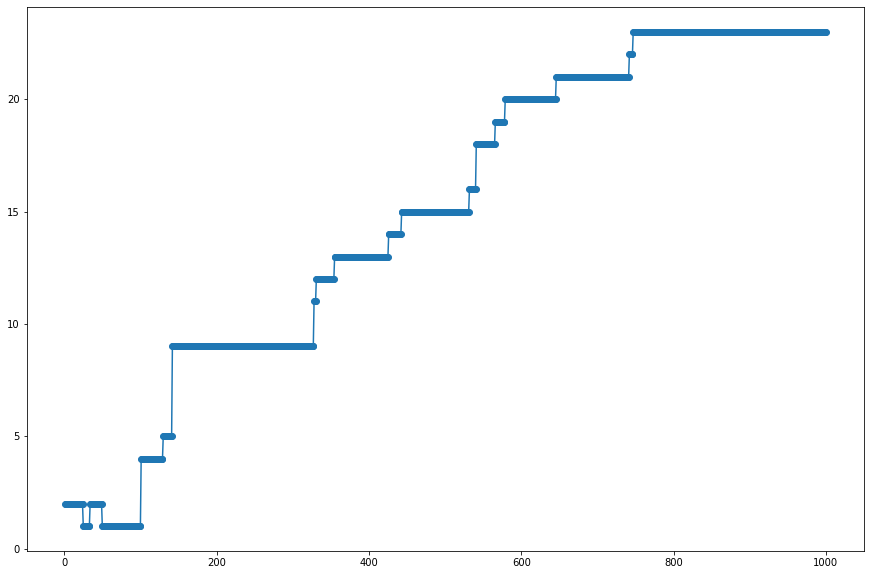

In [556]:
start = time.perf_counter_ns()       
best_state_sa2, best_fitness_sa2, curve_sa2 = ml.simulated_annealing(
    problem, 
    schedule = schedule,
    max_attempts = max_attempts,
    max_iters = max_iters,
    init_state = None,
    random_state = random_state,
    curve=display_curve)
end = time.perf_counter_ns()
train_time_sa2 = end - start

print(f'best state: {best_state_sa2}')
print(f'best fitness score: {best_fitness_sa2}')
print(f'number of iterations: {len(curve_sa2)}')
print(f'time taken: {train_time_sa2}')

plot_curve(curve_sa2)

best state: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0]
best fitness score: 94.0
number of iterations: 287
time taken: 5894070097


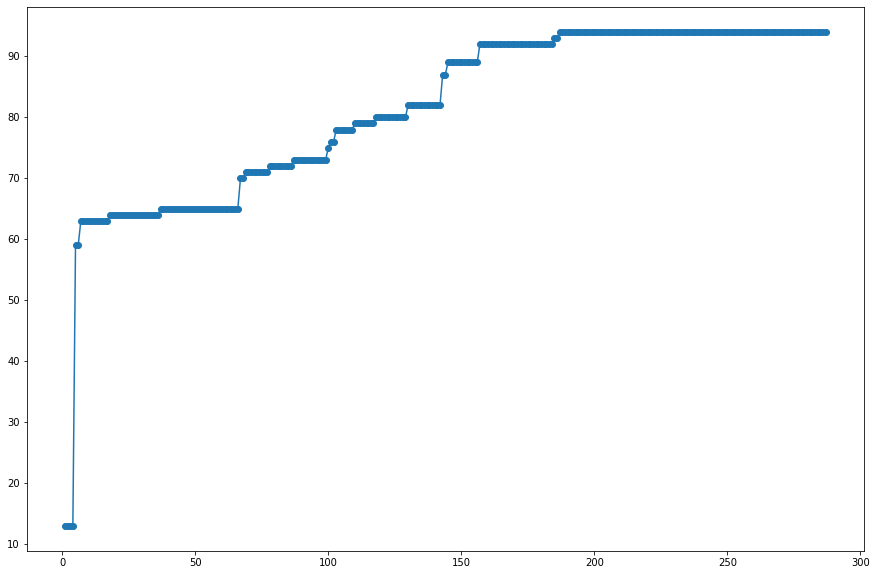

In [557]:
start = time.perf_counter_ns()
best_state_ga2, best_fitness_ga2, curve_ga2 = ml.genetic_alg(
    problem,
    pop_size=pop_size,
    mutation_prob=mutation_prob,
    max_attempts=max_attempts,
    max_iters=max_iters,
    curve=display_curve,
    random_state=random_state)
end = time.perf_counter_ns()
train_time_ga2 = end - start

print(f'best state: {best_state_ga2}')
print(f'best fitness score: {best_fitness_ga2}')
print(f'number of iterations: {len(curve_ga2)}')
print(f'time taken: {train_time_ga2}')

plot_curve(curve_ga2)

best state: [1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0]
best fitness score: 62.0
number of iterations: 105
time taken: 259154766976


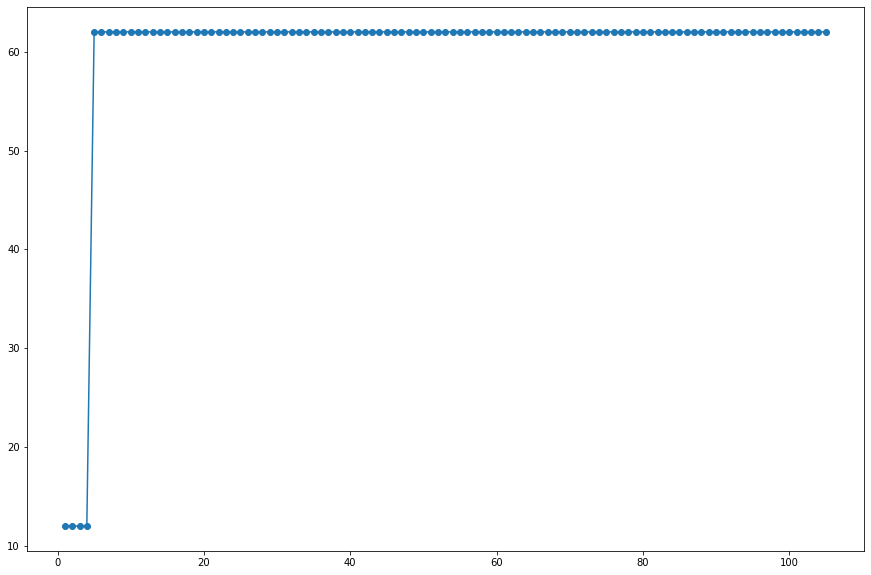

In [558]:
start = time.perf_counter_ns()
best_state_m2, best_fitness_m2, curve_m2 = ml.mimic(
    problem,
    pop_size=pop_size,
    keep_pct=keep_pct,
    max_attempts=max_attempts,
    max_iters=max_iters,
    curve=display_curve,
    random_state=random_state)
end = time.perf_counter_ns()
train_time_m2 = end - start

print(f'best state: {best_state_m2}')
print(f'best fitness score: {best_fitness_m2}')
print(f'number of iterations: {len(curve_m2)}')
print(f'time taken: {train_time_m2}')

plot_curve(curve_m2)

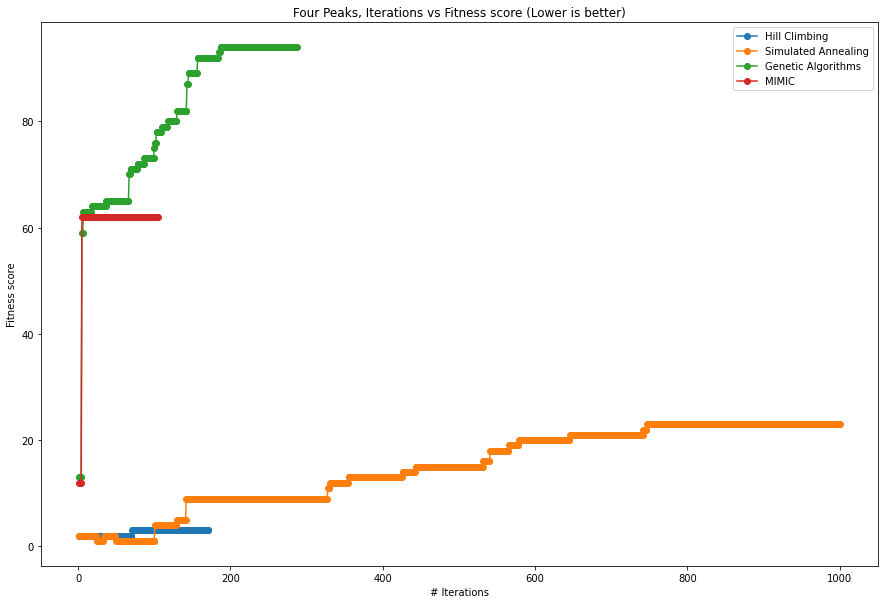

In [664]:
plt.figure(figsize=(15, 10))
plt.plot([i for i in range(1, len(curve_hc2) + 1)], curve_hc2[:, 0], '-o', label="Hill Climbing")
plt.plot([i for i in range(1, len(curve_sa2) + 1)], curve_sa2[:, 0], '-o', label="Simulated Annealing")
plt.plot([i for i in range(1, len(curve_ga2) + 1)], curve_ga2[:, 0], '-o', label="Genetic Algorithms")
plt.plot([i for i in range(1, len(curve_m2) + 1)], curve_m2[:, 0], '-o', label="MIMIC")
plt.title("Four Peaks, Iterations vs Fitness score (Lower is better)")
plt.xlabel("# Iterations")
plt.ylabel("Fitness score")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Algortihm run time')

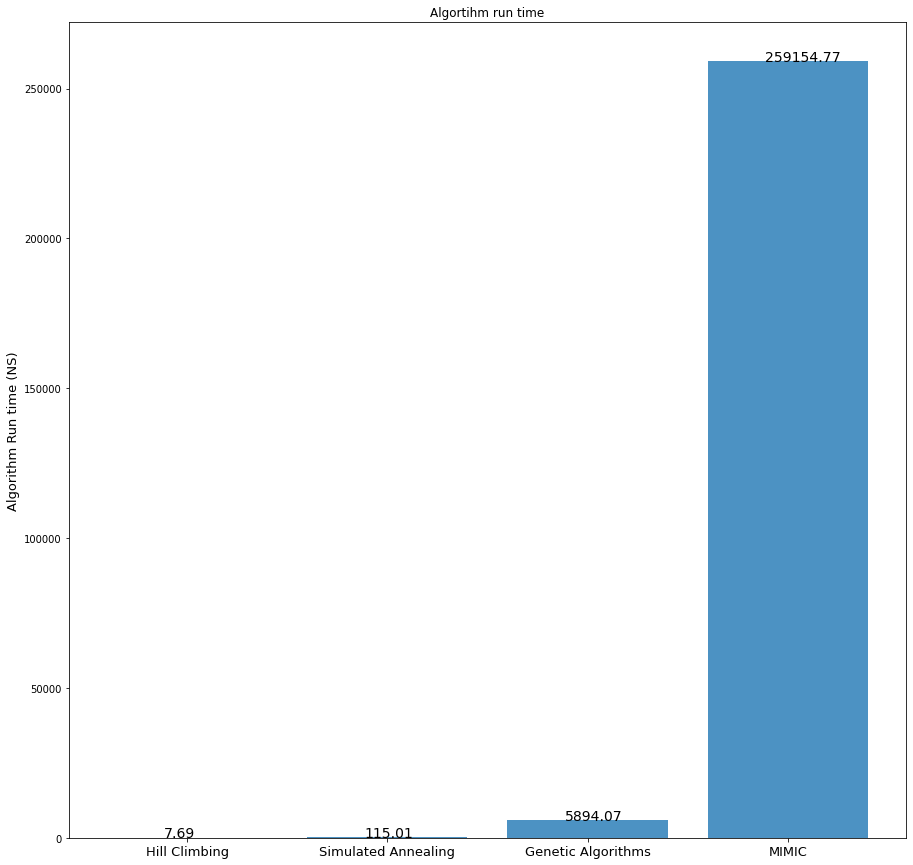

In [562]:
objects = ('Hill Climbing', 'Simulated Annealing','Genetic Algorithms', 'MIMIC')
y_pos = np.arange(len(objects))
train_times = np.around(np.array([train_time_hc2, train_time_sa2, train_time_ga2, train_time_m2]) / 1e6, 2)

plt.figure(figsize=(15, 15))
# plt.ylim(0.2, 0.9)
plt.bar(y_pos, train_times, align='center', alpha=0.8)
plt.xticks(y_pos, objects, fontsize=13)
for index, value in enumerate(train_times):
    plt.text(index-0.115, value+100, str(value), fontsize=14)
plt.ylabel('Algorithm Run time (NS)', fontsize=13)
plt.title('Algortihm run time')

# Problem 3 - One Max

In [520]:
fitness = ml.OneMax()
problem = ml.DiscreteOpt(length = 10, fitness_fn = fitness, maximize=True)

best state: [1 1 1 1 1 1 1 1 1 1]
best fitness score: 10.0
number of iterations: 130
time taken: 9438059


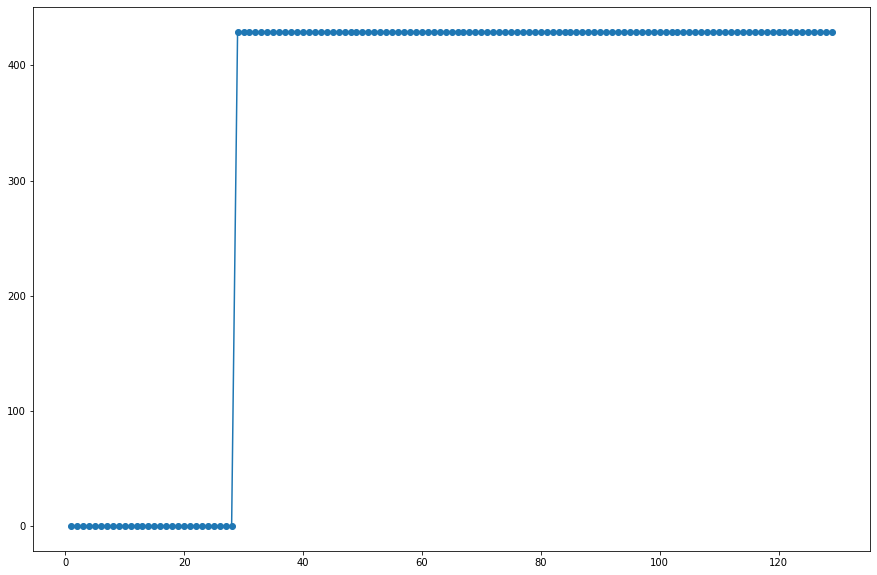

In [521]:
start = time.perf_counter_ns()
best_state_hc3, best_fitness_hc3, curve_hc3 = ml.random_hill_climb(
    problem,
    max_attempts=max_attempts,
    max_iters=max_iters,
    restarts=0,
    init_state=None,
    curve=display_curve,
    random_state=random_state)
end = time.perf_counter_ns()
train_time_hc3 = end - start

print(f'best state: {best_state_hc3}')
print(f'best fitness score: {best_fitness_hc3}')
print(f'number of iterations: {len(curve_hc3)}')
print(f'time taken: {train_time_hc1}')

plot_curve(curve_hc1)

best state: [1 1 1 1 1 1 1 1 1 1]
best fitness score: 10.0
number of iterations: 237
time taken: 30434871


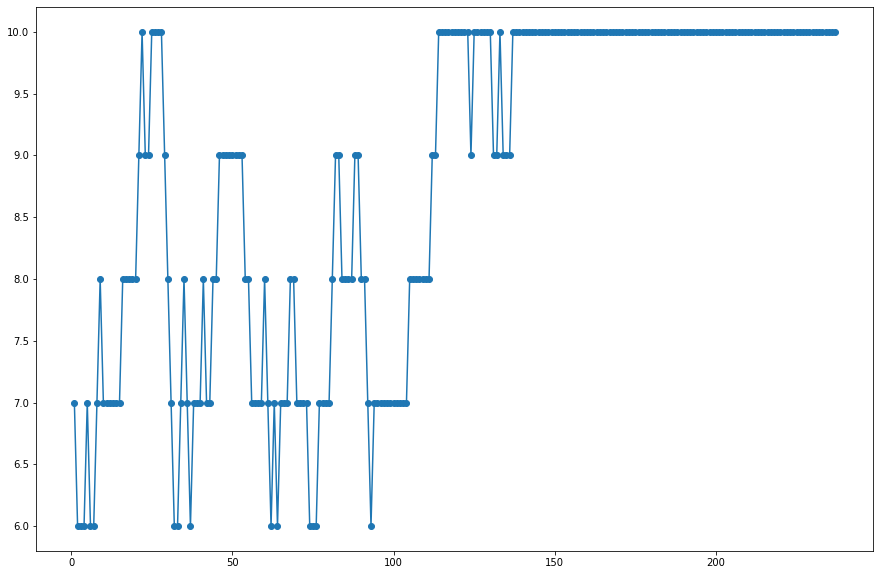

In [522]:
start = time.perf_counter_ns()       
best_state_sa3, best_fitness_sa3, curve_sa3 = ml.simulated_annealing(
    problem, 
    schedule = schedule,
    max_attempts = max_attempts,
    max_iters = max_iters,
    init_state = None,
    random_state = random_state,
    curve=display_curve)
end = time.perf_counter_ns()
train_time_sa3 = end - start

print(f'best state: {best_state_sa3}')
print(f'best fitness score: {best_fitness_sa3}')
print(f'number of iterations: {len(curve_sa3)}')
print(f'time taken: {train_time_sa3}')

plot_curve(curve_sa3)

best state: [1 1 1 1 1 1 1 1 1 1]
best fitness score: 10.0
number of iterations: 102
time taken: 1526624706


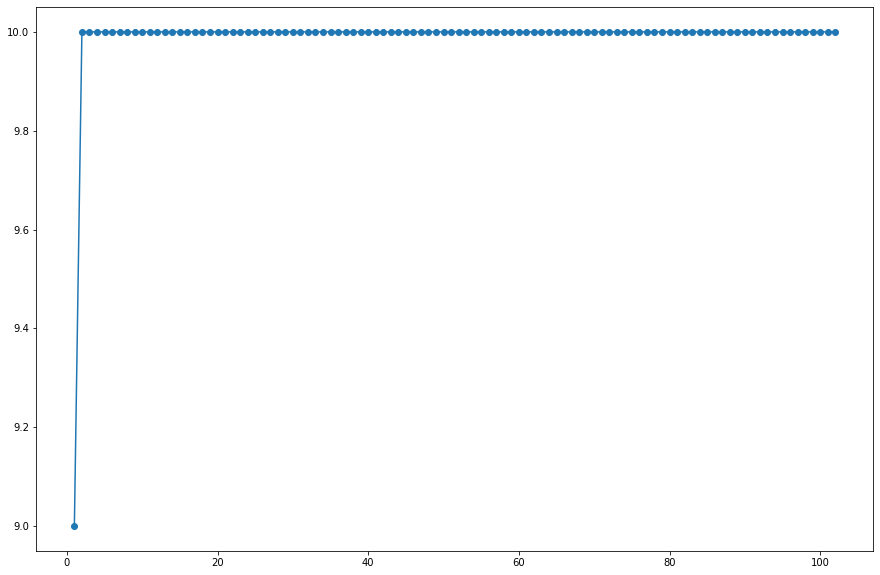

In [523]:
start = time.perf_counter_ns()
best_state_ga3, best_fitness_ga3, curve_ga3 = ml.genetic_alg(
    problem,
    pop_size=pop_size,
    mutation_prob=mutation_prob,
    max_attempts=max_attempts,
    max_iters=max_iters,
    curve=display_curve,
    random_state=random_state)
end = time.perf_counter_ns()
train_time_ga3 = end - start

print(f'best state: {best_state_ga3}')
print(f'best fitness score: {best_fitness_ga3}')
print(f'number of iterations: {len(curve_ga3)}')
print(f'time taken: {train_time_ga3}')

plot_curve(curve_ga3)

best state: [1 1 1 1 1 1 1 1 1 1]
best fitness score: 10.0
number of iterations: 102
time taken: 10342719891


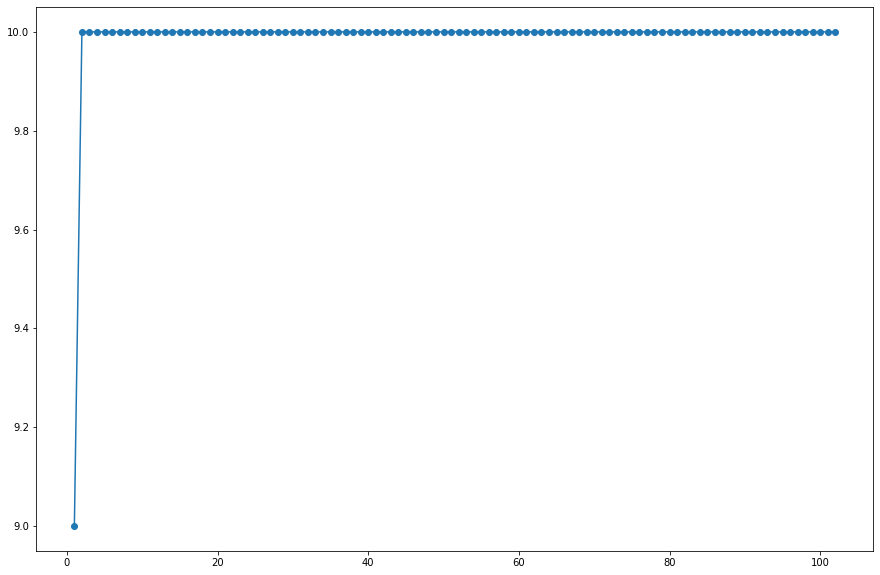

In [524]:
start = time.perf_counter_ns()
best_state_m3, best_fitness_m3, curve_m3 = ml.mimic(
    problem,
    pop_size=pop_size,
    keep_pct=keep_pct,
    max_attempts=max_attempts,
    max_iters=max_iters,
    curve=display_curve,
    random_state=random_state)
end = time.perf_counter_ns()
train_time_m3 = end - start

print(f'best state: {best_state_m3}')
print(f'best fitness score: {best_fitness_m3}')
print(f'number of iterations: {len(curve_m3)}')
print(f'time taken: {train_time_m3}')

plot_curve(curve_m3)

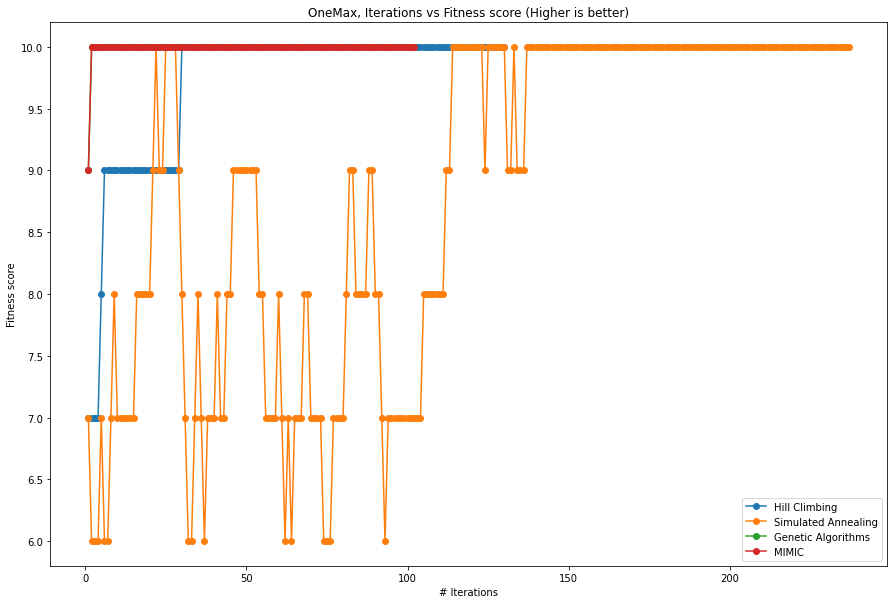

In [525]:
plt.figure(figsize=(15, 10))
plt.plot([i for i in range(1, len(curve_hc3) + 1)], curve_hc3[:, 0], '-o', label="Hill Climbing")
plt.plot([i for i in range(1, len(curve_sa3) + 1)], curve_sa3[:, 0], '-o', label="Simulated Annealing")
plt.plot([i for i in range(1, len(curve_ga3) + 1)], curve_ga3[:, 0], '-o', label="Genetic Algorithms")
plt.plot([i for i in range(1, len(curve_m3) + 1)], curve_m3[:, 0], '-o', label="MIMIC")
plt.title("OneMax, Iterations vs Fitness score (Higher is better)")
plt.xlabel("# Iterations")
plt.ylabel("Fitness score")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Algortihm run time')

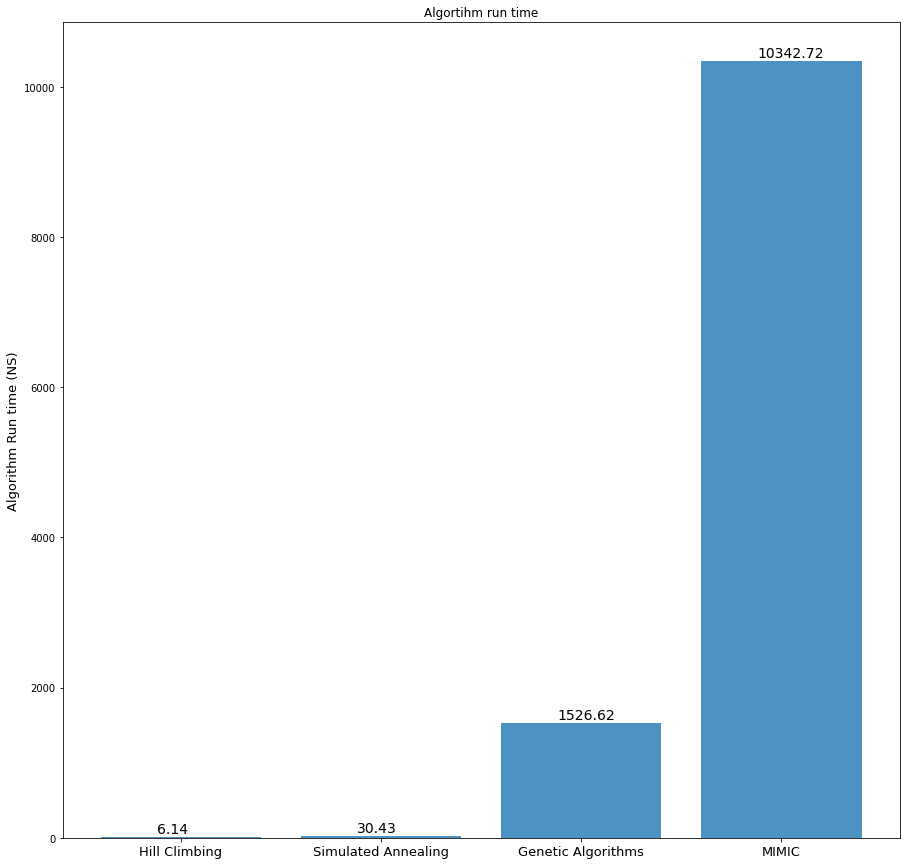

In [526]:
objects = ('Hill Climbing', 'Simulated Annealing','Genetic Algorithms', 'MIMIC')
y_pos = np.arange(len(objects))
train_times = np.around(np.array([train_time_hc3, train_time_sa3, train_time_ga3, train_time_m3]) / 1e6, 2)

plt.figure(figsize=(15, 15))
# plt.ylim(0.2, 0.9)
plt.bar(y_pos, train_times, align='center', alpha=0.8)
plt.xticks(y_pos, objects, fontsize=13)
for index, value in enumerate(train_times):
    plt.text(index-0.12, value+50, str(value), fontsize=14)
plt.ylabel('Algorithm Run time (NS)', fontsize=13)
plt.title('Algortihm run time')

# Problem 4 - Neural Network weights

## Dataset 1

In [673]:
data = pd.read_csv('data/adult.data')
test = pd.read_csv('data/adult.test')

# get discrete class columns from data, and one hot encode
discrete_classes = ['workclass',
                    'education', 
                    'sex',
                    'marital-status',
                    'occupation',
                    'relationship', 
                    'native-country',
                    'race', 
                    'salary-class']
encoded_train = pd.get_dummies(data[discrete_classes])
encoded_test = pd.get_dummies(test[discrete_classes])

# drop old non-encoded columns from data, and add encoded data
data.drop(columns=discrete_classes, inplace=True)
data = pd.concat([data, encoded_train], axis=1)
test.drop(columns=discrete_classes, inplace=True)
test = pd.concat([test, encoded_test], axis=1)

# drop extra output column as 'salary <= 50k' -> 0, and 'salary >50k' -> 1
data.drop(columns=['salary-class_ <=50K'], inplace=True)
data.rename(columns={'salary-class_ >50K': 'salary-class'}, inplace=True)
test.drop(columns=['salary-class_ <=50K'], inplace=True)
test.rename(columns={'salary-class_ >50K': 'salary-class'}, inplace=True)

x_keys = set(data.keys()) - set(['salary-class']) & set(test.keys()) - set(['salary-class'])
y_keys = set(['salary-class'])

X_train = data[x_keys]
X_test = test[x_keys]

Y_train = data[y_keys].to_numpy().ravel()
Y_test = test[y_keys].to_numpy().ravel()

In [674]:
start = time.perf_counter_ns()
nn = ml.NeuralNetwork(
    hidden_nodes=[10],
    activation='relu',
    algorithm='genetic_alg', 
    max_iters=1000, 
    bias=True,
    is_classifier=True,
    learning_rate=0.1,
    early_stopping=False, 
    clip_max=100.0,
    restarts=0,
    schedule=ml.GeomDecay(),
    pop_size=50,
    mutation_prob=0.1,
    max_attempts=10,
    random_state=1,
    curve=True)
nn.fit(X_train, Y_train)
end = time.perf_counter_ns()

curve_ga_nn = nn.fitness_curve
preds = nn.predict(X_test)
acc_ga_nn = accuracy_score(preds, Y_test)
time_ga_nn = end - start

print(f'accuracy: {acc_ga_nn}')
print(f'time to train: {time_ga_nn}')

accuracy: 0.8010564461642405
time to train: 2629359608166


In [698]:
start = time.perf_counter_ns()
nn = ml.NeuralNetwork(
    hidden_nodes=[10],
    activation='relu',
    algorithm='random_hill_climb', 
    max_iters=1000, 
    bias=True,
    is_classifier=True,
    learning_rate=0.1,
    early_stopping=False, 
    clip_max=100.0,
    restarts=0,
    schedule=ml.GeomDecay(),
    pop_size=50,
    mutation_prob=0.1,
    max_attempts=10,
    random_state=1,
    curve=True)
nn.fit(X_train, Y_train)
end = time.perf_counter_ns()

curve_hc_nn = nn.fitness_curve
preds = nn.predict(X_test)
acc_hc_nn = accuracy_score(preds, Y_test)
time_hc_nn = end - start

print(f'accuracy: {acc_hc_nn}')
print(f'time to train: {time_hc_nn}')

accuracy: 0.23573490571832198
time to train: 51636831271


In [699]:
start = time.perf_counter_ns()
nn = ml.NeuralNetwork(
    hidden_nodes=[10],
    activation='relu',
    algorithm='simulated_annealing', 
    max_iters=1000, 
    bias=True,
    is_classifier=True,
    learning_rate=0.1,
    early_stopping=False, 
    clip_max=100.0,
    restarts=0,
    schedule=ml.GeomDecay(),
    pop_size=50,
    mutation_prob=0.1,
    max_attempts=10,
    random_state=1,
    curve=True)
nn.fit(X_train, Y_train)
end = time.perf_counter_ns()

curve_sa_nn = nn.fitness_curve
preds = nn.predict(X_test)
acc_sa_nn = accuracy_score(preds, Y_test)
time_sa_nn = end - start

print(f'accuracy: {acc_sa_nn}')
print(f'time to train: {time_sa_nn}')

accuracy: 0.23622627602727106
time to train: 89482635904


## Dataset 2

In [700]:
data2 = pd.read_csv('data/UCI_Credit_Card.csv')
target_column = ['default.payment.next.month']

data2.loc[(data2.SEX == 1), 'SEX'] = 'male'
data2.loc[(data2.SEX == 2), 'SEX'] = 'female'

data2.drop(index=data2.index[data2['EDUCATION'] == 0], inplace=True)
data2.loc[(data2.EDUCATION == 1), 'EDUCATION'] = 'graduate school'
data2.loc[(data2.EDUCATION == 2), 'EDUCATION'] = 'university'
data2.loc[(data2.EDUCATION == 3), 'EDUCATION'] = 'high school'
data2.loc[(data2.EDUCATION == 4), 'EDUCATION'] = 'others'
data2.loc[(data2.EDUCATION == 5), 'EDUCATION'] = 'unknown'
data2.loc[(data2.EDUCATION == 6), 'EDUCATION'] = 'unknown'

data2.drop(index=data2.index[data2['MARRIAGE'] == 0], inplace=True)
data2.loc[(data2.MARRIAGE == 1), 'MARRIAGE'] = 'married'
data2.loc[(data2.MARRIAGE == 1), 'MARRIAGE'] = 'married'
data2.loc[(data2.MARRIAGE == 2), 'MARRIAGE'] = 'single'
data2.loc[(data2.MARRIAGE == 3), 'MARRIAGE'] = 'others'

data2.drop(columns=['ID'], inplace=True)

discerete_columns = [
    'SEX',
    'EDUCATION',
    'MARRIAGE'
]
encoded_train2 = pd.get_dummies(data2[discerete_columns])

# drop old non-encoded columns from data, and add encoded data
data2.drop(columns=discerete_columns, inplace=True)
data2 = pd.concat([data2, encoded_train2], axis=1)

# Drop columns which are causing accuracy to drop
data2.drop(columns=data2.filter(regex="(SEX_)").columns, inplace=True)
data2.drop(columns=data2.filter(regex="(MARRIAGE_)").columns, inplace=True)
data2.drop(columns=data2.filter(regex="(LIMIT_BAL)").columns, inplace=True)
data2.drop(columns=['AGE'], inplace=True)

x_keys2 = set(data2.keys()) - set(target_column) & set(data2.keys()) - set(target_column)
y_keys2 = set(target_column)

first_split = data2.sample(frac=0.6,random_state=200)
second_split = data2.drop(first_split.index)

X_train2 = first_split[x_keys2]
Y_train2 = first_split[y_keys2].to_numpy().ravel()

X_test2 = second_split[x_keys2]
Y_test2 = second_split[y_keys2].to_numpy().ravel()

In [ ]:
start = time.perf_counter_ns()
nn = ml.NeuralNetwork(
    hidden_nodes=[100],
    activation='relu',
    algorithm='genetic_alg', 
    max_iters=1000, 
    bias=True,
    is_classifier=True,
    learning_rate=0.1,
    early_stopping=False, 
    clip_max=100.0,
    restarts=0,
    schedule=ml.GeomDecay(),
    pop_size=50,
    mutation_prob=0.1,
    max_attempts=10,
    random_state=1,
    curve=True)
nn.fit(X_train, Y_train)
end = time.perf_counter_ns()

curve_ga2_nn = nn.fitness_curve
acc_ga2_nn = accuracy_score(preds, Y_test)
time_ga2_nn = end - start

print(f'accuracy: {acc_ga2_nn}')
print(f'time to train: {time_ga2_nn}')

In [ ]:
start = time.perf_counter_ns()
nn = ml.NeuralNetwork(
    hidden_nodes=[100],
    activation='relu',
    algorithm='random_hill_climb', 
    max_iters=1000, 
    bias=True,
    is_classifier=True,
    learning_rate=0.1,
    early_stopping=False, 
    clip_max=100.0,
    restarts=5,
    schedule=ml.GeomDecay(),
    pop_size=50,
    mutation_prob=0.1,
    max_attempts=10,
    random_state=1,
    curve=True)
nn.fit(X_train, Y_train)
end = time.perf_counter_ns()

curve_hc2_nn = nn.fitness_curve
preds = nn.predict(X_test)
acc_hc2_nn = accuracy_score(preds, Y_test)
time_hc2_nn = end - start

print(f'accuracy: {acc_hc2_nn}')
print(f'time to train: {time_hc2_nn}')

In [ ]:
start = time.perf_counter_ns()
nn = ml.NeuralNetwork(
    hidden_nodes=[100],
    activation='relu',
    algorithm='simulated_annealing', 
    max_iters=1000, 
    bias=True,
    is_classifier=True,
    learning_rate=0.1,
    early_stopping=False, 
    clip_max=100.0,
    restarts=0,
    schedule=ml.GeomDecay(),
    pop_size=50,
    mutation_prob=0.1,
    max_attempts=10,
    random_state=1,
    curve=True)
nn.fit(X_train, Y_train)
end = time.perf_counter_ns()

curve_sa2_nn = nn.fitness_curve
acc_sa2_nn = accuracy_score(preds, Y_test)
time_sa2_nn = end - start

print(f'accuracy: {acc_sa2_nn}')
print(f'time to train: {time_sa2_nn}')

In [ ]:
print(acc_ga_nn)
print(acc_hc_nn)
print(acc_sa_nn)

print(acc_ga2_nn)
print(acc_hc2_nn)
print(acc_sa2_nn)

print(time_ga_nn)
print(time_hc_nn)
print(time_sa_nn)

print(time_ga2_nn)
print(time_hc2_nn)
print(time_sa2_nn)

In [ ]:
objects = ('Back propagation', 'Hill Climbing', 'Simulated Annealing','Genetic Algorithms')
y_pos = np.arange(len(objects))
train_times_1 = np.around(np.array([8640 * 1e6, time_ga_nn, time_hc_nn, time_sa_nn]) / 1e6, 2)
train_times_2 = np.around(np.array([2400 * 1e6, time_ga2_nn, time_hc2_nn, time_sa2_nn]) / 1e6, 2)

plt.figure(figsize=(15, 15))
# plt.ylim(0.2, 0.9)
plt.bar(y_pos-0.2, train_times_1, 0.4, align='center', alpha=0.8, label="Dataset 1")
plt.bar(y_pos+0.2, train_times_2, 0.4, align='center', alpha=0.8, label="Dataset 2")
plt.xticks(y_pos, objects, fontsize=13)
for index, value in enumerate(zip(train_times_1, train_times_2)):
    plt.text(index-0.35, value[0]+30000, str(value[0]), fontsize=14)
    plt.text(index+0.05, value[1]+30000, str(value[1]), fontsize=14)
plt.ylabel('Algorithm train time (MS)', fontsize=13)
plt.title('Algortihm run time')

In [ ]:
objects = ('Back propagation', 'Hill Climbing', 'Simulated Annealing','Genetic Algorithms')
y_pos = np.arange(len(objects))
train_acc_1 = np.around([0.815, acc_ga_nn, acc_hc_nn, acc_sa_nn], 3)
train_acc_2 = np.around([0.745, acc_ga2_nn, acc_hc2_nn, acc_sa2_nn], 3)

plt.figure(figsize=(15, 15))
# plt.ylim(0.2, 0.9)
plt.bar(y_pos-0.2, train_acc_1, 0.4, align='center', alpha=0.8, label="Dataset 1")
plt.bar(y_pos+0.2, train_acc_2, 0.4, align='center', alpha=0.8, label="Dataset 2")
plt.xticks(y_pos, objects, fontsize=13)
for index, value in enumerate(zip(train_acc_1, train_acc_2)):
    plt.text(index-0.3, value[0]+0.005, str(value[0]), fontsize=14)
    plt.text(index+0.1, value[1]+0.005, str(value[1]), fontsize=14)
plt.ylabel('Algorithm weight accuracy', fontsize=13)
plt.title('Algortihm final accuracy with trained weights')

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot([i for i in range(1, len(curve_ga_nn) + 1)], curve_ga_nn[:, 0], '-o', label="Hill Climbing")
plt.plot([i for i in range(1, len(curve_hc_nn) + 1)], curve_hc_nn[:, 0], '-o', label="Simulated Annealing")
plt.plot([i for i in range(1, len(curve_sa_nn) + 1)], curve_sa_nn[:, 0], '-o', label="Genetic Algorithms")
plt.title("Neural network fitness curve -- Dataset 1")
plt.xlabel("# Iterations")
plt.ylabel("Fitness score")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot([i for i in range(1, len(curve_ga2_nn) + 1)], curve_ga_nn[:, 0], '-o', label="Hill Climbing")
plt.plot([i for i in range(1, len(curve_hc2_nn) + 1)], curve_hc_nn[:, 0], '-o', label="Simulated Annealing")
plt.plot([i for i in range(1, len(curve_sa2_nn) + 1)], curve_sa_nn[:, 0], '-o', label="Genetic Algorithms")
plt.title("Neural network fitness curve -- Dataset 2")
plt.xlabel("# Iterations")
plt.ylabel("Fitness score")
plt.legend()
plt.show()